Fatemeh Zahedi HW3 1215240130 STP 598

In [2]:
### import

### basic 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import math

import seaborn as sns; sns.set()
#%matplotlib inline


##sklearn learners
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

##sklearn metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

##sklearn model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

--------
Question1

In [3]:
cd = pd.read_csv("http://www.rob-mcculloch.org/data/susedcars.csv")
cd = cd[['price','mileage','year']]
cd['price'] = cd['price']/1000
cd['mileage'] = cd['mileage']/1000

In [46]:
X = cd.iloc[:,[1]].to_numpy()
y = cd['price'].to_numpy()
X.shape

(1000, 1)

In [6]:
rng = np.random.RandomState(34)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=rng, test_size=.2)

kvec = np.arange(348) + 2 #values of k to try
ormsev = np.zeros(len(kvec)) # storage for oos rsmse
irmsev = np.zeros(len(kvec)) # storage for in-sample rsmse

for i in range(len(kvec)):
   #print(i)
   tmod = KNeighborsRegressor(n_neighbors=kvec[i])
   tmod.fit(Xtrain,ytrain)
   yhat = tmod.predict(Xtest)
   ormsev[i] = math.sqrt(mean_squared_error(ytest,yhat))
   yhat = tmod.predict(Xtrain)
   irmsev[i] = math.sqrt(mean_squared_error(ytrain,yhat))

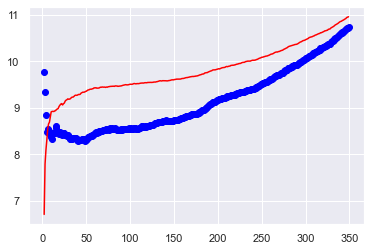

In [8]:
# plot rmse vs k
plt.scatter(kvec,ormsev,c='blue')
plt.plot(kvec,irmsev,c='red')

Text(0.5, 1.0, 'rmse: blue: out of sample, red: in sample')

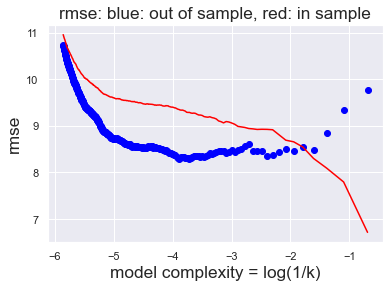

In [9]:
# plot rmse vs model complexity
mcmp = np.log(1/kvec) #model complexity
plt.scatter(mcmp,ormsev,c='blue')
plt.plot(mcmp,irmsev,c='red')
plt.xlabel('model complexity = log(1/k)',size='x-large')
plt.ylabel('rmse',size='x-large')
plt.title('rmse: blue: out of sample, red: in sample',size='x-large')

Based on eye-ball method we can choose a k around k=100

8.548553226299584


Text(0, 0.5, 'y')

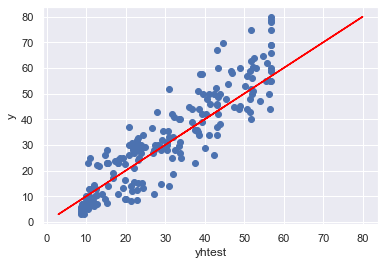

In [25]:
tmod = KNeighborsRegressor(n_neighbors=100)
tmod.fit(Xtrain,ytrain)
yhateye = tmod.predict(Xtest)
ormsev = math.sqrt(mean_squared_error(ytest,yhateye))
print(ormsev)
plt.scatter(yhateye,ytest)
plt.plot(ytest,ytest,c='red') #add the line
plt.xlabel('yhtest'); plt.ylabel('y')


In [19]:
tempmod = KNeighborsRegressor(n_neighbors=40) #knn with k=40

## rmse from cross validation
cvres = cross_val_score(tempmod,X,y,cv=5,scoring='neg_mean_squared_error') #cross val with 5 folds

# tranform to rmse
rmse = math.sqrt(np.mean(-cvres)) 
print('the rmse for k=40 based on 5-fold is:', rmse)

## do it again but shuffle the data
np.random.seed(34) 
indices = np.random.choice(X.shape[0],X.shape[0],replace=False)
ys = y[indices]
Xs = X[indices,:]
cvres = cross_val_score(tempmod,Xs,ys,cv=5,scoring='neg_mean_squared_error')
rmse = math.sqrt(np.mean(-cvres))
print('the rmse for k=40 based on 5-fold is:', rmse)

the rmse for k=40 based on 5-fold is: 9.400370251995131
the rmse for k=40 based on 5-fold is: 9.347582008064498


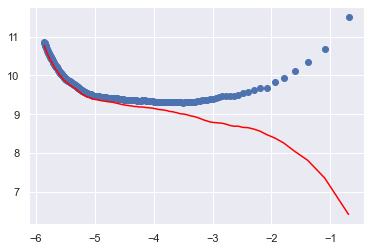

In [21]:
model = KNeighborsRegressor() # create the knn model

# do cv at every value of k in kvec
trainS, testS = validation_curve(model,X,y,'n_neighbors',kvec,cv=5,scoring='neg_mean_squared_error')


# transform neg_mean_squared_error to rmse
trrmse = np.sqrt(-trainS.mean(axis=1))
termse = np.sqrt(-testS.mean(axis=1))

#plot in and out of sample rmse
plt.scatter(mcmp,termse)
plt.plot(mcmp,trrmse,c='red')

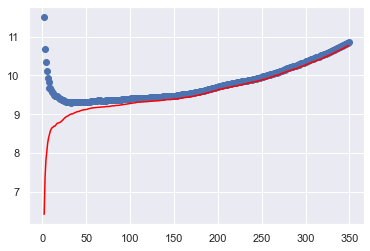

In [22]:
plt.scatter(kvec,termse)
plt.plot(kvec,trrmse,c='red')

Based on 5-fold cross validation I think K=50 is a good value

8.315365111986125


Text(0, 0.5, 'y')

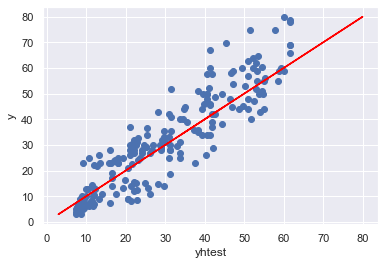

In [24]:
tmod2 = KNeighborsRegressor(n_neighbors=50)
tmod2.fit(Xtrain,ytrain)
yhat = tmod2.predict(Xtest)
ormsev = math.sqrt(mean_squared_error(ytest,yhat))
print(ormsev)
plt.scatter(yhat,ytest)
plt.plot(ytest,ytest,c='red') #add the line
plt.xlabel('yhtest'); plt.ylabel('y')

error based on k from 5-fold cross validation is lower than eye-ball method

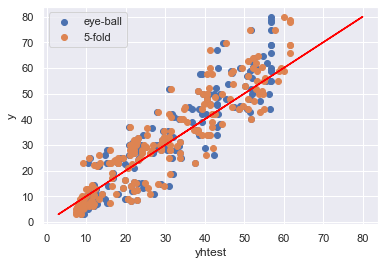

In [29]:
plt.scatter(yhateye,ytest,label='eye-ball')
plt.scatter(yhat,ytest,label='5-fold')
plt.plot(ytest,ytest,c='red') #add the line
plt.xlabel('yhtest'); plt.ylabel('y')
plt.legend()

In [47]:
tmod2 = KNeighborsRegressor(n_neighbors=50)
tmod2.fit(X,y)
xinput=np.array([[100000/1000]])
yhat100 = tmod2.predict(xinput)
print(yhat100)

[17.76114]


-------------
Question2

In [49]:
X = cd.iloc[:,[1,2]].to_numpy()
y = cd['price'].to_numpy()
X.shape

(1000, 2)

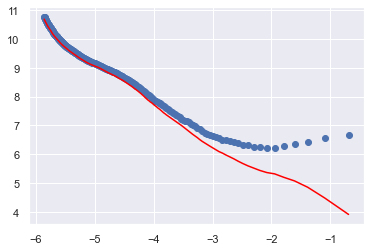

In [50]:
model = KNeighborsRegressor() # create the knn model

# do cv at every value of k in kvec
trainS, testS = validation_curve(model,X,y,'n_neighbors',kvec,cv=5,scoring='neg_mean_squared_error')


# transform neg_mean_squared_error to rmse
trrmse = np.sqrt(-trainS.mean(axis=1))
termse = np.sqrt(-testS.mean(axis=1))

#plot in and out of sample rmse
plt.scatter(mcmp,termse)
plt.plot(mcmp,trrmse,c='red')

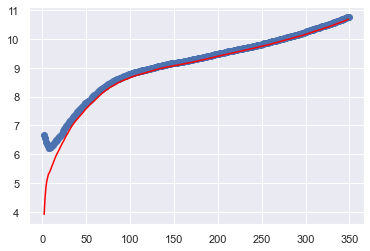

In [32]:
plt.scatter(kvec,termse)
plt.plot(kvec,trrmse,c='red')

In [52]:
rng = np.random.RandomState(34)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=rng, test_size=.2)

6.958091773499892


Text(0, 0.5, 'y')

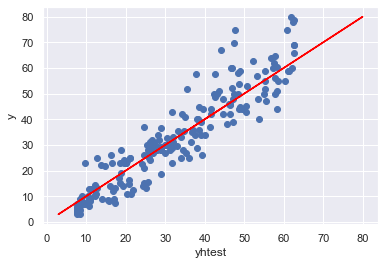

In [53]:
tmod3 = KNeighborsRegressor(n_neighbors=40)
tmod3.fit(Xtrain,ytrain)
yhat = tmod3.predict(Xtest)
ormsev = math.sqrt(mean_squared_error(ytest,yhat))
print(ormsev)
plt.scatter(yhat,ytest)
plt.plot(ytest,ytest,c='red') #add the line
plt.xlabel('yhtest'); plt.ylabel('y')

Adding year decreased the error clearly

In [54]:
tmod3 = KNeighborsRegressor(n_neighbors=40)
tmod3.fit(X,y)
xinput=np.array([[75.0, 2008.]])
yhat75 = tmod3.predict(xinput)
print(yhat75)


[29.4746]


-----------
Question3

6.552581486719303


Text(0, 0.5, 'y')

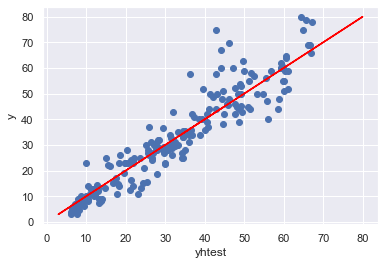

In [55]:
tmod4 = KNeighborsRegressor(n_neighbors=40, weights='distance')
tmod4.fit(Xtrain,ytrain)
yhat = tmod4.predict(Xtest)
ormsev = math.sqrt(mean_squared_error(ytest,yhat))
print(ormsev)
plt.scatter(yhat,ytest)
plt.plot(ytest,ytest,c='red') #add the line
plt.xlabel('yhtest'); plt.ylabel('y')

The new weighting option helps to reduce the error, So it works better

In [56]:
tmod4 = KNeighborsRegressor(n_neighbors=40, weights='distance')
tmod4.fit(X,y)
xinput=np.array([[75.0, 2008.]])
yhat75 = tmod4.predict(xinput)
print(yhat75)

[30.52997871]
